# Python 3 project to predict the outcome of the 2023 FIFA Women's World Cup

I decided on this project because when researching projects to learn Pandas and Jupyter Notebooks, I found many related to mens sports predictions by far less about women's sport. With the FIFA Women's World Cup taking place this Summer, it felt like a good time to try and predict how those games might go.

Lets start by importing and cleaning the data. We need to make sure there aren't any problems that could affect the prediction.

In [97]:
# Library Imports
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [98]:
# Read in the data
game_data = pd.read_csv("data/results.csv")

In [99]:
# Clean the data 
# This will tell me the number of items in each column that has an NA value
game_data.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [100]:
game_data.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [101]:
game_data["date"] = pd.to_datetime(game_data["date"])
game_data.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [102]:
#Sort values by date and display the oldest 5 games in the notebook 
game_data.sort_values("date").head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [103]:
# Do the same for the shootouts data
# Import
shootout_data = pd.read_csv("data/shootouts.csv")
# Find NA data
shootout_data.isna().sum()
# Change date type
shootout_data["date"] = pd.to_datetime(shootout_data["date"])
shootout_data.dtypes
#Sort values by date and display the most oldest 5 games in the notebook 
shootout_data.sort_values("date").head()

,date,home_team,away_team,winner
0,1995-06-13,Sweden,China PR,China PR
1,1999-07-10,Brazil,Norway,Brazil
2,1999-07-10,United States,China PR,United States
3,2009-03-12,France,New Zealand,France
4,2011-07-09,England,France,France


Now that the data is clean, lets make it easier to identify the results of each match: wins, draws and losses.

In [104]:
# Add a new column showing the result
# Show conditions for win, loss or draw for the home team
c1 = game_data['home_score'].eq(game_data['away_score'])
c2 = game_data['home_score'] > game_data['away_score']
game_data['home result'] = np.select([c1, c2], ['Draw', 'Win'], 'Loss')
game_data.sort_values("date").head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home result
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,Win
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,Win
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True,Win
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,Win
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,Win


In [105]:
# Add a new column showing goal difference for the home team
game_data['goal difference'] = game_data['home_score'] - game_data['away_score']
game_data.sort_values("date").head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home result,goal difference
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,Win,1
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,Win,1
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True,Win,2
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,Win,2
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,Win,1


In [106]:
# Remove the columns showing the home and away score, and the city and country.
game_data = game_data.drop(['home_score', 'away_score', 'country'], axis=1)
game_data.sort_values("date").head()

,date,home_team,away_team,tournament,city,neutral,home result,goal difference
0,1969-11-01,Italy,France,Euro,Novara,False,Win,1
1,1969-11-01,Denmark,England,Euro,Aosta,True,Win,1
2,1969-11-02,England,France,Euro,Turin,True,Win,2
3,1969-11-02,Italy,Denmark,Euro,Turin,False,Win,2
4,1975-08-25,Thailand,Australia,AFC Championship,Hong Kong,True,Win,1


<Axes: title={'center': 'Home Results'}, ylabel='count'>

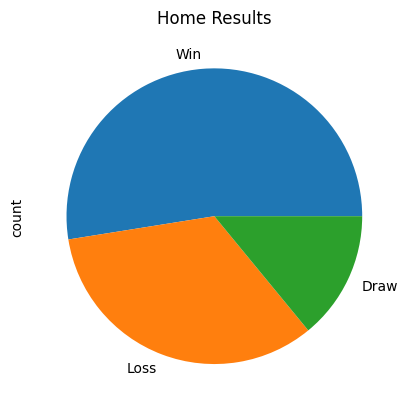

In [127]:
# Visualise results
game_data["home result"].value_counts().plot.pie(title='Home Results')

In [128]:
print(game_data["home result"].value_counts())

home result
Win     2565
Loss    1633
Draw     686
Name: count, dtype: int64


<Axes: title={'center': 'Goal Differences'}, xlabel='goal difference'>

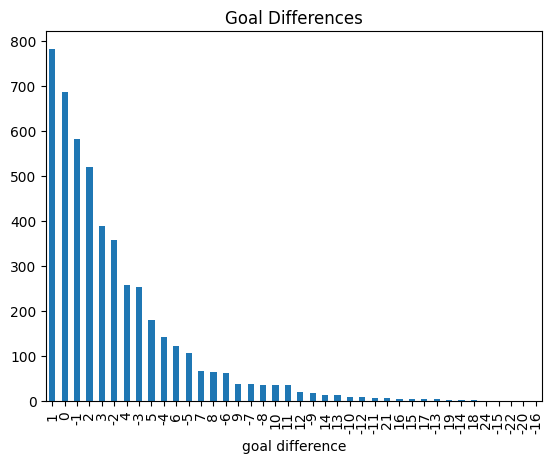

In [130]:
# Visualise goal difference
game_data['goal difference'].value_counts().plot.bar(title='Goal Differences')